In [0]:
# importa o pandas
import pandas as pd

Ler a base de dados

In [0]:
# ler o dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep=",")

In [0]:
# define o nome das colunas
df.columns = [ 'Class'
              ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
             ]

In [4]:
# imprime as 5 primeiras linhas
df.head()

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
# estatística descritiva
df.describe()

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
# selecionando algumas colunas
df_sub = df[['proline','alcohol','malicAcid','magnesium','flavanoids']]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


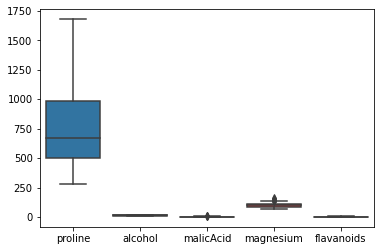

In [7]:
# plota boxplot de algumas colunas
import seaborn as sns
ax = sns.boxplot(data=df_sub)

In [8]:
# estatística descritiva
df_sub.describe()

,proline,alcohol,malicAcid,magnesium,flavanoids
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,745.096045,12.993672,2.339887,99.587571,2.023446
std,314.884046,0.808808,1.119314,14.174018,0.998658
min,278.000000,11.030000,0.740000,70.000000,0.340000
25%,500.000000,12.360000,1.600000,88.000000,1.200000
50%,672.000000,13.050000,1.870000,98.000000,2.130000
75%,985.000000,13.670000,3.100000,107.000000,2.860000
max,1680.000000,14.830000,5.800000,162.000000,5.080000


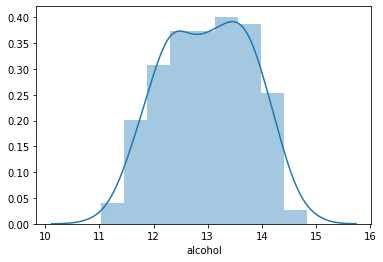

In [9]:
# distribuição da coluna alcohol
ax = sns.distplot(df_sub.alcohol)

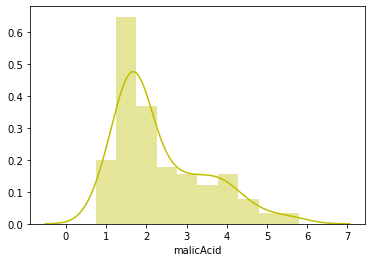

In [10]:
# distribuição da coluna malicAcid
ax = sns.distplot(df_sub.malicAcid, color='y')

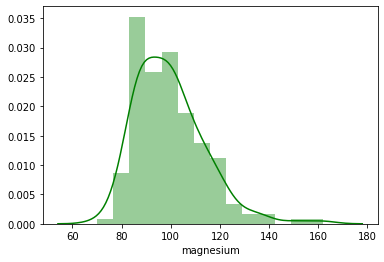

In [12]:
# distribuição da coluna magnesium
ax = sns.distplot(df_sub.magnesium, color='g')

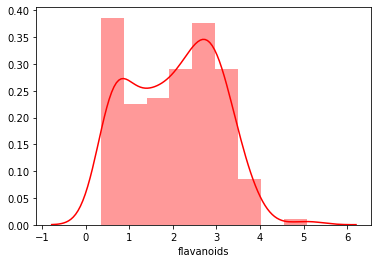

In [11]:
# distribuição da coluna magnesium
ax = sns.distplot(df_sub.flavanoids, color='r')

Aplicando o Standartization

In [0]:
# importa o Standscaler da scikit-learn
from sklearn.preprocessing import StandardScaler

In [0]:
# cria o objeto obj_std
obj_std = StandardScaler().fit(df)

In [0]:
# aplica o padronizador nos dados
df_std = obj_std.transform(df)

In [16]:
# imprime os dados
df_std

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

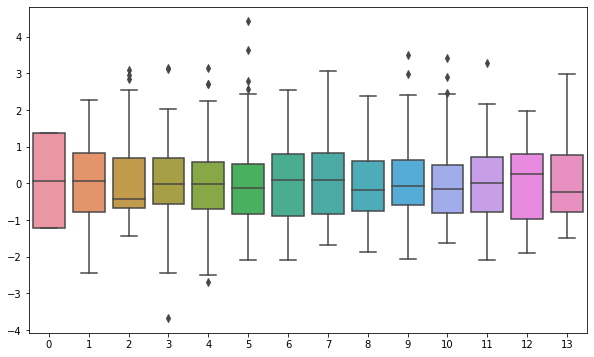

In [17]:
# visualizando o boxplot dos dados
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))

ax = sns.boxplot(data=df_std)

In [0]:
# transforma em dataframe
df_std = pd.DataFrame(df_std)

In [19]:
# imprime as estatísticas descritivas do conjunto
df_std.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,1.327250e-15,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.222468e+00,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-1.222468e+00,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,7.320166e-02,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,1.368871e+00,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,1.368871e+00,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


Aplicando Normalização usando Scikit-learn

In [0]:
# importa o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
# imprime as 5 primeiras linhas
df.head()

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [0]:
# treina o algoritmo e cria o objeto obj_norm
obj_norm = MinMaxScaler().fit(df)

In [0]:
# aplica o normalizador
norm_df = obj_norm.transform(df)

In [24]:
# imprime os dados normalizados
norm_df

array([[0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       [0.        , 0.87894737, 0.23913043, ..., 0.30894309, 0.7985348 ,
        0.85734665],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

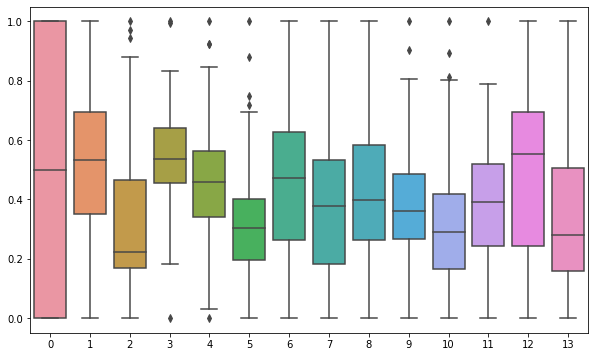

In [25]:
# visualiza os boxplots
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=norm_df)

In [0]:
# transforma o numpy array para um dataframe
norm_df = pd.DataFrame(norm_df)

In [27]:
# estatística descritiva
norm_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.471751,0.516756,0.316183,0.538053,0.459637,0.321604,0.452503,0.355157,0.438333,0.371277,0.322082,0.387791,0.488752,0.333164
std,0.386996,0.212844,0.221208,0.147102,0.171962,0.154065,0.216022,0.210687,0.235194,0.180298,0.198332,0.186289,0.258279,0.224596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350000,0.169960,0.454545,0.340206,0.195652,0.262069,0.181435,0.264151,0.264984,0.164676,0.243902,0.241758,0.158345
50%,0.500000,0.531579,0.223320,0.534759,0.458763,0.304348,0.472414,0.377637,0.396226,0.359621,0.290102,0.390244,0.553114,0.281027
75%,1.000000,0.694737,0.466403,0.641711,0.561856,0.402174,0.627586,0.531646,0.584906,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Algoritmos de Machine Learning

Separa os dados e suas classes

In [0]:
# cria o dataframe X com todos os dados removendo a classe
X = df.drop('Class', axis=1)

In [0]:
# a variável y recebe os dados de classes
y = df['Class']

In [0]:
# Split into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Aplicando Machine Learning

In [0]:
# treinando um modelo KNN
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# cria o objeto knn
knn = KNeighborsClassifier()

In [33]:
# treina os dados
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# atribui as classificações a variável resultados
resultados = knn.predict(X_test)

In [0]:
# carrega o pacote accuracy_score
from sklearn.metrics import accuracy_score

In [0]:
# cria a variável score
score = accuracy_score(y_test, resultados)

In [37]:
# imprime score (acurácia)
score

0.75

Machine Learning com Pipelines

In [0]:
# importa o pacote do pipeline
from sklearn.pipeline import Pipeline

In [0]:
# carrega os pacotes
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
from sklearn import svm

In [0]:
# cria os pipelines
pip_std = Pipeline([('scaler', StandardScaler()),
                    ('KNN', KNeighborsClassifier())
                   ])

pip_minmax = Pipeline([('minmax', MinMaxScaler()),
                       ('KNN', KNeighborsClassifier())
                      ])

pip_std_svm = Pipeline([('scaler', StandardScaler()),
                       ('KNN', svm.SVC())
                      ])
pip_minmax_svm = Pipeline([('minmax', MinMaxScaler()),
                       ('KNN', svm.SVC())
                      ])

Aplicando o MixMaxScaler

In [42]:
# executa o pipeline
pip_minmax.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [43]:
# imprime o score
pip_minmax.score(X_test, y_test)

0.9722222222222222

Aplicando StandardScaler

In [44]:
# executa o pipeline pip_std
pip_std.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [45]:
# imprime o score
pip_std.score(X_test, y_test)

0.9722222222222222

Aplica SVM com os pré-processadores

In [46]:
pip_std_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [47]:
pip_std_svm.score(X_test, y_test)

1.0

## **Quando usar Padronização ou Normalização?**

*   Algoritmos que utilizam cálculos de distância. (Knn, K-means, SVM).
*   Algoritmos que usam Gradient Decendent.
*   Algoritmos baseados em árvores.
*   Redes Neurais.
